In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib



In [8]:
df.head()

,temperatureC,moisture_percent,gas_index,risk
0,33.09,76.0,1713,14.871064
1,33.09,74.0,1713,14.863337
2,33.09,71.0,1713,14.851753
3,33.09,66.0,1713,14.832462
4,33.09,65.0,1713,14.828606


In [11]:
df = pd.read_csv("dataset_with_risk.csv")

X = df[["temperatureC", "gas_index", "moisture_percent"]]
y = df["risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("R2 Score:", r2_score(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))

joblib.dump(model, "trained_model.pkl")

print(" Model trained and saved.")

R2 Score: 0.9994721461911958
Mean Absolute Error: 0.1870117280811932
✅ Model trained and saved.


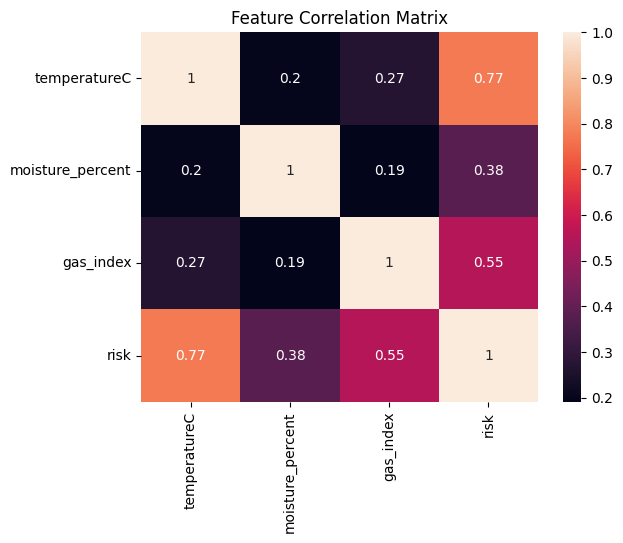

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

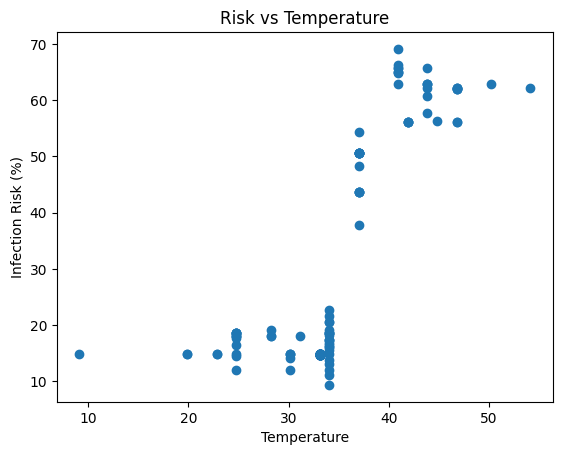

In [14]:
plt.figure()
plt.scatter(df["temperatureC"], df["risk"])
plt.xlabel("Temperature")
plt.ylabel("Infection Risk (%)")
plt.title("Risk vs Temperature")
plt.show()

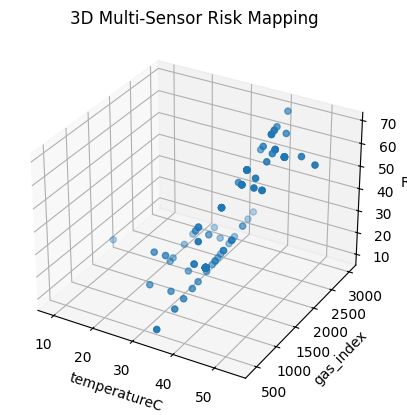

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["temperatureC"], df["gas_index"], df["risk"])

ax.set_xlabel("temperatureC")
ax.set_ylabel("gas_index")
ax.set_zlabel("Risk")

plt.title("3D Multi-Sensor Risk Mapping")
plt.show()

In [7]:
df = pd.read_csv("dataset_anniheal.csv")

baseline_temp = 34

def normalize(val, minv, maxv):
    return (val - minv) / (maxv - minv)

risk_list = []

for _, row in df.iterrows():
    delta_temp = row["temperatureC"] - baseline_temp
    
    norm_temp = normalize(delta_temp, 0, 4)
    norm_gas = normalize(row["gas_index"], 0, 4095)
    norm_moisture = normalize(row["moisture_percent"], 0, 4095)
    
    norm_temp = np.clip(norm_temp, 0, 1)
    norm_gas = np.clip(norm_gas, 0, 1)
    norm_moisture = np.clip(norm_moisture, 0, 1)

    weighted = 0.4*norm_temp + 0.35*norm_gas + 0.25*norm_moisture
    probability = 1 / (1 + np.exp(-5*(weighted - 0.5)))

    risk_list.append(probability * 100)

df["risk"] = risk_list

df.to_csv("dataset_with_risk.csv", index=False)

print("Risk column generated successfully")

Risk column generated successfully


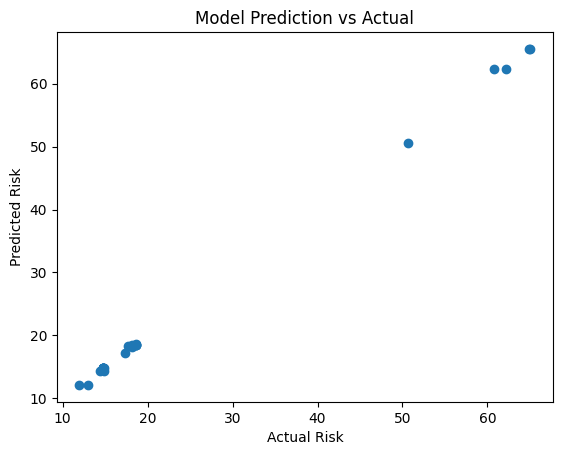

In [16]:
plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel("Actual Risk")
plt.ylabel("Predicted Risk")
plt.title("Model Prediction vs Actual")
plt.show()

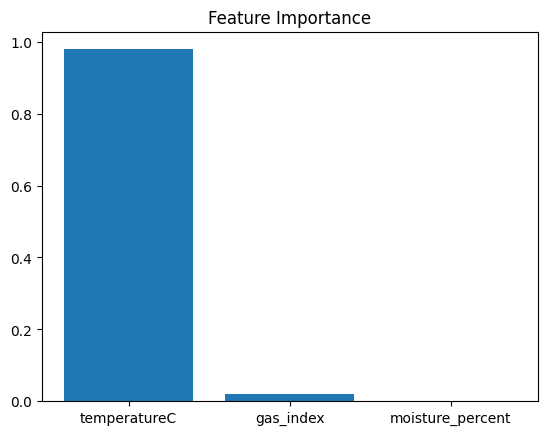

In [17]:
importances = model.feature_importances_

plt.figure()
plt.bar(["temperatureC", "gas_index", "moisture_percent"], importances)
plt.title("Feature Importance")
plt.show()